<a href="https://colab.research.google.com/github/camila-marquess/analise-exploratoria-dos-dados/blob/master/An%C3%A1lise_Explorat%C3%B3ria_Desempenho_Escolar_Alunos_GDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise Exploratória de Dados 


---
Dataset: Desempenho Escolar Alunos GDF



---





## Leitura do Dataset:

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import warnings

warnings.filterwarnings('ignore')

def get_data():
    
  
    !wget http://dados.df.gov.br/dataset/b8436049-44e7-4224-95b4-224718a4b166/resource/3e654a9d-0647-4e39-930e-7cd07faec888/download/dados-abertos---desempenho-escolar20180515160111.zip

    with zipfile.ZipFile('dados-abertos---desempenho-escolar20180515160111.zip', 'r') as zip_ref:
        zip_ref.extractall()

    return pd.read_csv('dados abertos - desempenho escolar_20180515_160111.csv',sep=';',encoding='iso-8859-1')

df = get_data()

--2020-04-15 20:06:46--  http://dados.df.gov.br/dataset/b8436049-44e7-4224-95b4-224718a4b166/resource/3e654a9d-0647-4e39-930e-7cd07faec888/download/dados-abertos---desempenho-escolar20180515160111.zip
Resolving dados.df.gov.br (dados.df.gov.br)... 131.72.222.17
Connecting to dados.df.gov.br (dados.df.gov.br)|131.72.222.17|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99777290 (95M) [application/zip]
Saving to: ‘dados-abertos---desempenho-escolar20180515160111.zip.1’

dados-abertos---des 100%[===================>]  95.15M  8.74MB/s    in 13s     

2020-04-15 20:06:59 (7.56 MB/s) - ‘dados-abertos---desempenho-escolar20180515160111.zip.1’ saved [99777290/99777290]



#Função utilizada para padronizar as notas dos(as) alunos(as) para 0 - 10.

In [0]:
def padronizacao (x):
  if x > 10:
    return x / 10
  else:
    return x

df['nota_bimestral'] = df['nota_bimestral'].apply(padronizacao)

# Verificando a quantidade de linhas e colunas do dataset.

In [0]:
df.shape

O dataset tem 23 colunas e 12779084 linhas no total.

# Verificando os nomes das colunas: 

In [0]:
df.columns

O nome das colunas é: cod_coordenacao_regional, coordenacao_regional, cod_escola, escola, cod_curso, curso, cod_serie, serie, cod_turno, turno,cod_turma, turma, cod_aluno, bimestre, cod_disciplina, disciplina,nota_bimestral, aulas_bimestre, faltas_bimestre, faltas_justificadas_bimestre,aulas_globalizadas, faltas_globalizadas e faltas_justificadas_globalizadas.

# Qual turno de aula tem alunos com notas finais maiores? 

In [0]:
(
    df[(df.bimestre == 'resultado final')]
    .groupby('turno')
    .agg({'nota_bimestral':'mean'})
    .reset_index()
    .rename(columns={'turno':'Turno','nota_bimestral':'Notas Bimestrais'})
)

,Turno,Notas Bimestrais
0,Diurno,6.151030
1,Noturno,6.883233


Abaixo é a relação das médias das notas finais por turno:

In [0]:
(
   df[df.bimestre == 'resultado final']
    .loc[:,['disciplina','turno','nota_bimestral']]
    .groupby(['turno','disciplina'],as_index=False)
    .agg('mean')
    .sort_values(by=['disciplina'],ascending=True)
    .reset_index()
    .rename(columns={'turno':'Turno','disciplina':'Disciplinas','nota_bimestral':'Médias das Notas Bimestrais'})
    .drop(['index'],axis=1)
)

,Turno,Disciplinas,Médias das Notas Bimestrais
0,Diurno,Arte,6.753001
1,Noturno,Arte,7.363676
2,Diurno,Biologia,6.095158
3,Noturno,Biologia,7.282098
4,Diurno,Ciências Naturais,6.390369
5,Noturno,Ciências Naturais,7.259207
6,Diurno,Educação Física,7.213355
7,Noturno,Educação Física,7.829910
8,Diurno,Ensino Religioso,1.449921
9,Noturno,Ensino Religioso,3.450412


O turno noturno tem alunos com notas finais maiores.

# Quantos alunos diferentes o dataset possui?

In [0]:
df.cod_aluno.nunique()

O dataset possui 413.121 alunos diferentes.

# Quantas escolas diferentes o dataset possui?

In [0]:
df.cod_escola.nunique()

O dataset possui 627 escolas diferentes.

# Demonstrando a distribuição de alunos por série.

In [0]:
(
    df.drop_duplicates(subset=['cod_aluno'],keep='last').reset_index()
    .groupby('serie').cod_aluno.nunique()
    .reset_index()
    .rename(columns={'serie':'Série','cod_aluno':'Quantidade de Alunos(as)'})
    .sort_values(by=['Quantidade de Alunos(as)'],ascending=True)
    .reset_index()
    .drop(['index'],axis=1)
)

,Série,Quantidade de Alunos(as)
0,8º Ano especial,3
1,1ª Série EM Especial,6
2,Bloco Ensino Médio - 3ª série,16
3,2º Ciclo - Bloco 1,23
4,Berçário I,25
5,Berçário II,28
6,4º Ano especial,34
7,2º Período Especial,36
8,7º Ano especial,55
9,Bloco Ensino Médio - 2ª série,66


Pode-se perceber que a série que mais tem alunos(as) é o 6º ano, com 36.785 alunos(as) e a que menos tem é o 8º Ano especial, com apenas 3 alunos(as).

# Demonstrando a distribuição de escolas por coordenação regional.

In [0]:
(
    df[['escola']].groupby(df.coordenacao_regional).nunique()
    .reset_index()
    .rename(columns={'escola':'Quantidade de Escolas','coordenacao_regional':'Coordenação Regional'})
    .sort_values(['Quantidade de Escolas'], ascending = (True))
    .reset_index()
    .drop(['index'],axis=1)
)

,Coordenação Regional,Quantidade de Escolas
0,CRE - São Sebastião,24
1,CRE - Guará,25
2,CRE - Brazlândia,27
3,CRE - Recanto das Emas,27
4,CRE - Santa Maria,27
5,CRE - Núcleo Bandeirante,32
6,CRE - Paranoá,33
7,CRE - Samambaia,40
8,CRE - Sobradinho,44
9,CRE - Gama,47


A CRE que mais possui escolas, de acordo com a base, é Ceilândia com 91 escolas e a que menos possui é São Sebastião, com 24 escolas.

# Qual é a matéria que os alunos do ensino médio ('1ª Série', '2ª Série', '3ª Série') tiram, em média, a menor nota final?

In [0]:
filtro_serie = ['1ª Série', '2ª Série','3ª Série']

menor_nota = (
    df[(df.serie.isin(filtro_serie)) & (df.bimestre == 'resultado final')]
    .groupby('disciplina').nota_bimestral.mean().reset_index()
    .sort_values('nota_bimestral',ascending=True).reset_index()
    .drop(['index'],axis=1)
)
menor_nota

,disciplina,nota_bimestral
0,Ensino Religioso,1.394017
1,Projeto Interdisciplinar III,4.365675
2,Matemática,5.718658
3,Química,5.935454
4,Física,5.954836
5,Projeto Interdisciplinar II,6.045421
6,Língua Portuguesa,6.059749
7,Biologia,6.200268
8,História,6.316606
9,Filosofia,6.322245


A matéria que os alunos do Ensino Médio tiram, em média, a menor nota é Ensino Religioso.

# Qual é a coordenação regional com o maior número de notas máximas em matemática no último ano do ensino médio ('3ª Série')?

In [0]:
df_3serie = df[df['serie'] == '3ª Série']
df_3s_mat = df_3serie[df_3serie['disciplina'] == 'Matemática']
df_3s_mat_final = df_3s_mat[df_3s_mat['bimestre'] == 'resultado final']
df_3s_mat_final_max = df_3s_mat[df_3s_mat['nota_bimestral'] == 10.0]
coords_max_notas = df_3s_mat_final_max.groupby('coordenacao_regional').count()
coords_max_notas['nota_bimestral']

coordenacao_regional
CRE - Brazlândia              2
CRE - Ceilândia             111
CRE - Gama                   12
CRE - Guará                  32
CRE - Núcleo Bandeirante     50
CRE - Paranoá                 9
CRE - Planaltina             47
CRE - Plano Piloto            6
CRE - Recanto das Emas       70
CRE - Samambaia             321
CRE - Santa Maria             4
CRE - Sobradinho             20
CRE - São Sebastião           6
CRE - Taguatinga            124
Name: nota_bimestral, dtype: int64

A coordenação regional com o maior número de notas de matemática dos(as) alunos(as) da 3ª série é Samambaia, com 321 notas máximas.

# Quantos valores nulos o dataset possui em cada coluna?

In [0]:
df.isna().sum()

cod_coordenacao_regional                   0
coordenacao_regional                       0
cod_escola                                 0
escola                                     0
cod_curso                                  0
curso                                      0
cod_serie                                  0
serie                                      0
cod_turno                                  0
turno                                      0
cod_turma                                896
turma                                    896
cod_aluno                                  0
bimestre                                   0
cod_disciplina                             0
disciplina                                 0
nota_bimestral                        788999
aulas_bimestre                       3423972
faltas_bimestre                      3423972
faltas_justificadas_bimestre         4274032
aulas_globalizadas                  11991797
faltas_globalizadas                 11990519
faltas_jus

Nas colunas cod_turma e turma o dataset possui 896 valores nulos; na coluna nota_bimestral: 788999, aulas_bimestre: 3423972, faltas_bimestre: 3423972, faltas_justificadas_bimestre: 4274032, aulas_globalizadas: 11991797, faltas_globalizadas: 11990519 e faltas_justificadas_globalizadas: 11991797.

# Qual a distribuição de alunos por curso?

In [0]:
(
    df.drop_duplicates(subset=['cod_aluno'],keep='last')
    .groupby('curso').cod_aluno.nunique()
    .reset_index()
    .rename(columns={'curso':'Curso','cod_aluno':'Quantidade de alunos(as)'})
    .sort_values(['Quantidade de alunos(as)'], ascending = (True))
    .reset_index()
    .drop(['index'],axis=1)
)

,Curso,Quantidade de alunos(as)
0,Ensino Médio - Especial,6
1,Educação Infantil - Especial,151
2,Ensino Médio - Socioeducação,272
3,Ensino Fundamental Socioeducação,659
4,Ensino Fundamental de 9 Anos - Especial,1570
5,Educação Infantil,43822
6,Ensino Médio,81689
7,Ensino Fundamental de 9 Anos,284952


Por meio da tabela acima, pode-se perceber que o Curso que possui menos alunos(as) é o Ensino Médio - Especial, com apenas seis alunos(as), enquanto o que mais possui é o Ensino Fundamental de 9 Anos, com 284.952 alunos(as).

# Os alunos que estudam na primeira série do ensino médio em escolas sobre a responsabilidade da CRE - Plano Piloto tem uma nota final de português melhor do que os alunos de outras CRE para mesma faixa e matéria. Verdadeiro ou Falso? 

* Verificando a média da CRE - Plano Piloto:

In [0]:
media_cre_planopiloto = (
    df[(df.serie == '1ª Série') & (df.disciplina == 'Língua Portuguesa') & (df.bimestre == 'resultado final') & (df.coordenacao_regional == 'CRE - Plano Piloto')]
    .loc[:,['nota_bimestral']]
    .mean()
)

media_cre_planopiloto

nota_bimestral    5.912861
dtype: float64

* Verificando a média das outras CRE's:

In [0]:
media_resto = (
    df[(df.serie == '1ª Série') & (df.disciplina == 'Língua Portuguesa') & (df.bimestre == 'resultado final') & (df.coordenacao_regional != 'CRE - Plano Piloto')]
    .loc[:,['nota_bimestral']]
    .mean()
)

media_resto

nota_bimestral    6.018709
dtype: float64

* Verificando a média da disciplina Língua Portuguesa em cada CRE:

In [0]:
df_1serie = df[df['serie'] == '1ª Série']
df_1s_pt = df_1serie[df_1serie['disciplina'] == 'Língua Portuguesa']
df_1s_pt_final = df_1s_pt[df_1s_pt['bimestre'] == 'resultado final']
df_drop = df_1s_pt_final.drop_duplicates(['cod_aluno'])
coords_max_notas = df_drop.groupby('coordenacao_regional').nota_bimestral.mean().reset_index()
df_renomear = coords_max_notas.rename(columns={'coordenacao_regional':'Coordenação Regional', 'nota_bimestral':'Nota média em Língua Portuguesa'})
df_sort = df_renomear.sort_values(['Nota média em Língua Portuguesa'], ascending = (True)).reset_index()
df_index = df_sort.drop(['index'],axis=1)

df_index

,Coordenação Regional,Nota média em Língua Portuguesa
0,CRE - Gama,5.343053
1,CRE - Brazlândia,5.404868
2,CRE - Planaltina,5.741006
3,CRE - Taguatinga,5.742273
4,CRE - Plano Piloto,5.912861
5,CRE - Santa Maria,5.918060
6,CRE - Núcleo Bandeirante,6.025726
7,CRE - Sobradinho,6.046464
8,CRE - Guará,6.171424
9,CRE - Ceilândia,6.242680


Falso. A média das notas finais de Língua Portuguesa da CRE - Plano Piloto foi de 5.912861, enquanto a média das notas finais das outras CRE's foi de 6.018709. Vale destacar que a CRE cujas escolas tiveram melhor desempenho foi a CRE - Recanto das Emas.

# Levando em consideração que para ser considerado aprovado o aluno deve tirar uma nota final maior do que 5, qual matéria do ensino médio reprova mais?

In [0]:
reprova = (
    df[(df.curso == 'Ensino Médio') & (df.bimestre == 'resultado final') & (df.nota_bimestral < 5)]
    .groupby('disciplina').nota_bimestral.count().reset_index()
    .rename(columns={'disciplina':'Disciplinas','nota_bimestral':'Quantidade de Alunos(as)'})
    .sort_values(['Quantidade de Alunos(as)'], ascending = (True)).reset_index()
    .drop(['index'],axis=1)
)

reprova

,Disciplinas,Quantidade de Alunos(as)
0,Educação Física,1655
1,Arte,3462
2,Geografia,4571
3,Sociologia,4599
4,Língua Estrangeira - Inglês,4633
5,Filosofia,4980
6,História,4988
7,Língua Estrangeira - Espanhol,5108
8,Biologia,5827
9,Língua Portuguesa,6770


A matéria que mais reprova é Ensino Religioso. 

# Criando um dataframe onde:

>Cada linha será um aluno (sem repetições) e somente alunos do terceiro ano;

>Cada coluna será uma matéria da lista [matemática, português, física, química, biologia, história, geografia];

>Cada valor da coluna será a nota final daquele aluno para aquela matéria.




O dataframe será nomeado new_df.

In [0]:
lista_disciplinas = ['Matemática','Língua Portuguesa','Física','Química','Biologia','História','Geografia']

df_serie = df[df.serie == '3ª Série']
df_resultado = df_serie[df_serie.bimestre == 'resultado final']
df_disciplinas = df_resultado[df_resultado.disciplina.isin(lista_disciplinas)]

new_df = pd.pivot_table(
    df_disciplinas,
    columns = 'disciplina',
    index = 'cod_aluno',
    values = 'nota_bimestral'
).reset_index()

new_df

disciplina,cod_aluno,Biologia,Física,Geografia,História,Língua Portuguesa,Matemática,Química
0,-9222315045875238055,9.999,9.999,9.999,9.999,9.999,9.999,9.999
1,-9221925063589591595,5.500,5.500,6.500,5.500,6.500,5.500,6.500
2,-9221882012413132674,8.500,7.500,8.500,9.500,9.000,9.500,7.500
3,-9219488772448250343,6.500,6.000,5.500,6.500,6.500,6.000,6.000
4,-9219232352633633557,6.000,0.000,0.000,5.500,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...
20164,9214336997376747859,9.999,9.999,9.999,9.999,9.999,9.999,9.999
20165,9214797594704690965,5.500,7.500,6.500,5.000,5.000,6.000,5.500
20166,9219327182647531473,6.000,5.500,5.500,5.500,6.500,5.500,5.500
20167,9219458618526893803,5.500,5.500,6.000,5.000,6.000,6.000,5.500


Primeiro a base foi filtrada de acordo com as disciplinas e série solicitadas. Após isso fez-se um pivot_table, colocando os códigos dos alunos como index, as disciplinas como colunas e as notas bimestrais do resultado final de cada aluno como valores.

In [0]:
new_df.cod_aluno.nunique()

20169

Verificando se os códigos dos alunos estão se repetindo. Pode-se perceber que não há repetições, já que o número de linhas também foi de 20.169.

# Existem valores nulos em new_df? Se sim, diga qual é a localização de cada valor nulo (index,column), trate os valores nulos da forma que achar mais adequada e descreva o porque tomou essa decisão.

In [0]:
new_df.isna().sum()

disciplina
cod_aluno             0
Biologia              5
Física                7
Geografia            12
História              2
Língua Portuguesa     1
Matemática            8
Química               9
dtype: int64

Sim, existem 5 valores nulos em Biologia, 7 em Física, 12 em Geografia, 2 em História, 1 em Língua Portuguesa, 8 em Matemática e 9 em Química. 

In [0]:
np.where(np.asanyarray(np.isnan(new_df)))

(array([  257,   974,  1291,  2596,  2918,  3001,  3552,  4564,  4669,
         5563,  5563,  5591,  5591,  5617,  5991,  6361,  6604,  6893,
         7864,  8754,  9571, 10056, 10969, 11249, 11485, 11710, 13119,
        14158, 14194, 14656, 15591, 16220, 17295, 18280, 18280, 18908,
        18908, 18908, 18908, 19284, 19284, 19529, 19529, 19690]),
 array([4, 6, 5, 2, 6, 6, 6, 2, 3, 1, 7, 1, 7, 3, 2, 6, 6, 3, 4, 3, 7, 3,
        7, 7, 2, 3, 2, 3, 6, 3, 3, 3, 3, 1, 7, 1, 2, 6, 7, 2, 3, 1, 7, 7]))

Este foi o código para demonstrar a localização de cada valor nulo por index e coluna. 

#Tratamento dos valores nulos

Biologia:

* Verificando a mediana de Biologia:

In [0]:
mediana_bio = new_df.Biologia.median()

print(mediana)

6.0


* Verificando a média de Biologia:

In [0]:
media_bio = new_df.Biologia.mean()

print(media_bio)

6.300778799188524


* Verificando a distribuição das notas:

(array([ 449.,   33.,   57.,   68.,   47., 6964., 6389., 3279., 1110.,
        1768.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

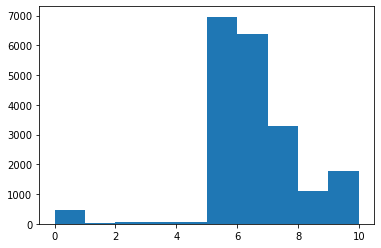

In [0]:
plt.figure()
plt.hist(new_df.Biologia)

* Decidiu-se pela imputação da mediana das notas de Biologia nos valores nulos, pois percebeu-se que se trata de uma distribuição assimétrica à direita.

In [0]:
imputacao_biologia = new_df['Biologia'].fillna(mediana_bio, inplace=True)

* Verificando se ainda há valores nulos:

In [0]:
new_df['Biologia'].isna().sum()

0

Física:

* Verificando a média das notas de Física:

In [0]:
media_fisica = new_df['Física'].mean()

print(media_fisica)

6.146949444838685


* Verificando a mediana das notas de Física:

In [0]:
mediana_fisica = new_df['Física'].median()

print(mediana_fisica)

6.0


* Verificando a distribuição dos dados:

(array([ 496.,   83.,   71.,   87.,   83., 8031., 5920., 2778.,  897.,
        1716.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

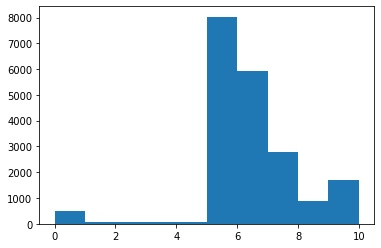

In [0]:
plt.figure()
plt.hist(new_df['Física'])

Decidiu-se pela imputação da mediana das notas de Física nos valores nulos, pois percebeu-se que se trata de uma distribuição assimétrica à direita.

In [0]:
imputacao_fisica = new_df['Física'].fillna(mediana_fisica, inplace=True)

* Verificando se ainda há valores nulos em Física:

In [0]:
new_df['Física'].isna().sum()

0

Geografia:

* Verificando a média de Geografia:

In [0]:
media_geo = new_df.Geografia.mean()

print(media_geo)

6.563195748693628


* Verificando a mediana de Geografia:

In [0]:
mediana_geo = new_df.Geografia.median()

print(mediana_geo)

6.5


* Verificando a distribuição dos dados:

(array([ 297.,   23.,   30.,   36.,   43., 5392., 6692., 4064., 1664.,
        1916.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

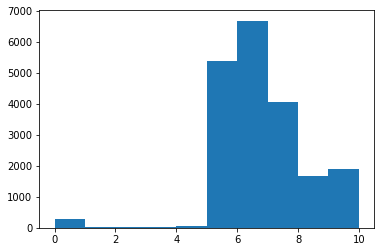

In [0]:
plt.figure()
plt.hist(new_df['Geografia'])

A média e a mediana de Geografia tiveram valores muito parecidos, decidiu-se por imputar a média.

In [0]:
imputacao_geo = new_df['Geografia'].fillna(media_geo, inplace=True)

* Verificando se ainda há valores nulos:

In [0]:
new_df.Geografia.isna().sum()

0

História:

* Verificando a média de História:

In [0]:
media_historia = new_df['História'].mean()

print(media_historia)

6.376820880975227


* Verificando a mediana:

In [0]:
mediana_historia = new_df['História'].median()

print(mediana_historia)

6.0


* Verificando a distribuição dos dados por meio de um histograma:

(array([ 449.,   35.,   42.,   61.,   42., 6289., 6610., 3564., 1279.,
        1796.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

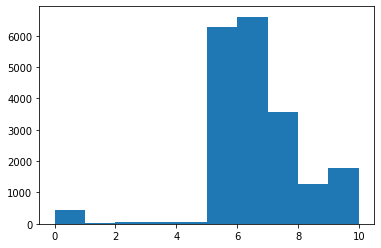

In [0]:
plt.figure()
plt.hist(new_df['História'])

Decidiu-se pela imputação da mediana das notas de História nos valores nulos, pois percebeu-se que se trata de uma distribuição assimétrica à direita.

In [0]:
imputacao_historia = new_df['História'].fillna(mediana_historia, inplace=True)

* Verificando se ainda há valores nulos: 

In [0]:
new_df['História'].isna().sum()

0

Língua Portuguesa:

* Verificando a média de Língua Portuguesa:

In [0]:
media_lp = new_df['Língua Portuguesa'].mean()

print(media_lp)

6.11031632819553


* Verificando a mediana:

In [0]:
mediana_lp = new_df['Língua Portuguesa'].median()

print(mediana_lp)

6.0


* Verificando a distribuição dos dados:

(array([ 534.,   52.,   94.,  137.,   91., 7784., 6539., 2630.,  697.,
        1610.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

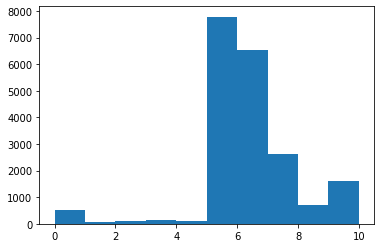

In [0]:
plt.figure()
plt.hist(new_df['Língua Portuguesa'])

Decidiu-se pela imputação da mediana das notas de Língua Portuguesa nos valores nulos, pois percebeu-se que se trata de uma distribuição assimétrica à direita.

In [0]:
imputacao_lp = new_df['Língua Portuguesa'].fillna(mediana_lp, inplace=True)

* Verificando se ainda há valores nulos:

In [0]:
new_df['Língua Portuguesa'].isna().sum()

0

Matemática:

* Verificando a média:

In [0]:
media_mat = new_df['Matemática'].mean()

print(media_mat)

5.875802872230918


* Verificando a mediana: 

In [0]:
mediana_mat = new_df['Matemática'].median()

print(mediana_mat)

5.5


* Verificando a distribuição dos dados:

(array([ 710.,  112.,  139.,  133.,  151., 9511., 5288., 1909.,  560.,
        1648.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

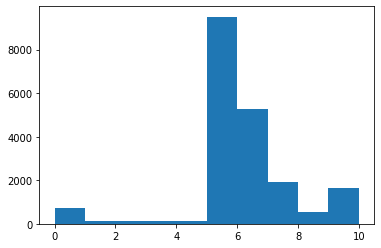

In [0]:
plt.figure()
plt.hist(new_df['Matemática'])

Decidiu-se pela imputação da mediana das notas de Matemática nos valores nulos, pois percebeu-se que se trata de uma distribuição assimétrica à direita.

In [0]:
imputacao_mat = new_df['Matemática'].fillna(mediana_mat, inplace=True)

* Verificando se ainda há valores nulos:

In [0]:
new_df['Matemática'].isna().sum()

0

Química:

* Verificando a média:

In [0]:
media_quimica = new_df['Química'].mean()

print(media_quimica)

6.037697257304437


* Verificando a mediana: 

In [0]:
mediana_quimica = new_df['Química'].median()

print(mediana_quimica)

6.0


* Verificando a distribuição das notas:

(array([ 614.,  102.,  114.,  114.,   77., 8527., 5706., 2409.,  819.,
        1687.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

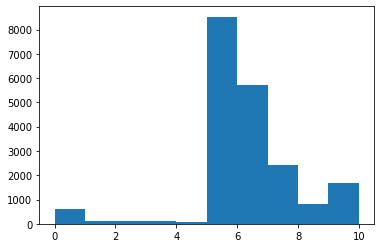

In [0]:
plt.figure()
plt.hist(new_df['Química'])

Apesar de a média e a mediana terem valores muito parecidos, decidiu-se pela imputação da mediana das notas de Química nos valores nulos, pois percebeu-se que se trata de uma distribuição assimétrica à direita.

In [0]:
imputacao_quimica = new_df['Química'].fillna(mediana_quimica, inplace=True)

* Verificando se ainda há valores nulos:

In [0]:
new_df['Química'].isna().sum()

9

# Descrevendo new_df (principais indicadores estatísticos).

In [0]:
new_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
disciplina,,,,,,,,
cod_aluno,20169.0,1.308996e+16,5.307924e+18,-9.222315e+18,-4.581947e+18,-2.718381e+16,4.595796e+18,9.219684e+18
Biologia,20169.0,6.300779e+00,1.701298e+00,0.000000e+00,5.500000e+00,6.000000e+00,7.000000e+00,1.000000e+01
Física,20169.0,6.146949e+00,1.749569e+00,0.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,1.000000e+01
Geografia,20169.0,6.563196e+00,1.601888e+00,0.000000e+00,5.500000e+00,6.500000e+00,7.500000e+00,1.000000e+01
História,20169.0,6.376821e+00,1.698153e+00,0.000000e+00,5.500000e+00,6.000000e+00,7.000000e+00,1.000000e+01
Língua Portuguesa,20169.0,6.110316e+00,1.726796e+00,0.000000e+00,5.500000e+00,6.000000e+00,6.500000e+00,1.000000e+01
Matemática,20169.0,5.875803e+00,1.852593e+00,0.000000e+00,5.000000e+00,5.500000e+00,6.500000e+00,1.000000e+01
Química,20169.0,6.037697e+00,1.814025e+00,0.000000e+00,5.000000e+00,6.000000e+00,6.500000e+00,1.000000e+01


# Qual a correlação entre as notas de cada matéria? É possível dizer que existe uma correlação forte entre química e física?

In [0]:
new_df.corr(method='pearson')

disciplina,cod_aluno,Biologia,Física,Geografia,História,Língua Portuguesa,Matemática,Química
disciplina,,,,,,,,
cod_aluno,1.000000,-0.001487,-0.014336,-0.002759,-0.004731,-0.001521,-0.002225,-0.006042
Biologia,-0.001487,1.000000,0.669739,0.659209,0.695525,0.710786,0.704608,0.726138
Física,-0.014336,0.669739,1.000000,0.646658,0.667726,0.684583,0.706539,0.689497
Geografia,-0.002759,0.659209,0.646658,1.000000,0.675112,0.687012,0.657860,0.651443
História,-0.004731,0.695525,0.667726,0.675112,1.000000,0.717950,0.705926,0.707876
Língua Portuguesa,-0.001521,0.710786,0.684583,0.687012,0.717950,1.000000,0.733266,0.746612
Matemática,-0.002225,0.704608,0.706539,0.657860,0.705926,0.733266,1.000000,0.745203
Química,-0.006042,0.726138,0.689497,0.651443,0.707876,0.746612,0.745203,1.000000


Existe uma correlação positiva entre Química e Física, porém, pode ser considerada uma correlação moderada.

# Demonstrando em um só gráfico as notas de química e língua portuguesa de todos os alunos.

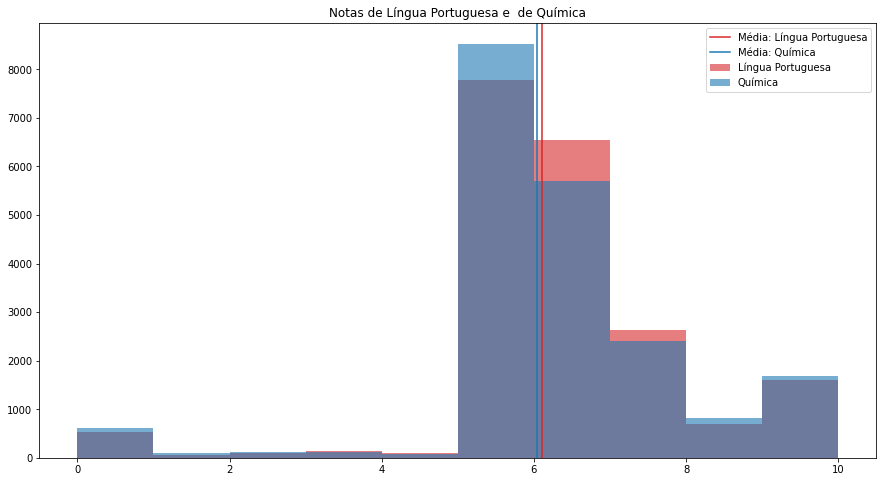

In [0]:
plt.figure(figsize=(15,8))
plt.title('Notas de Língua Portuguesa e  de Química', fontdict={'color': 'black'})
plt.hist(x = new_df['Língua Portuguesa'],color='tab:red',alpha=0.6,label='Língua Portuguesa')
plt.axvline(x = new_df['Língua Portuguesa'].mean(), color= 'tab:red',label='Média: Língua Portuguesa')
plt.axvline(x = new_df['Química'].mean(), color= 'tab:blue',label='Média: Química')
plt.hist(x = new_df['Química'],color='tab:blue',alpha=0.6,label='Química')
plt.legend()
plt.show()

# A distribuição de notas de história é simétrica? 

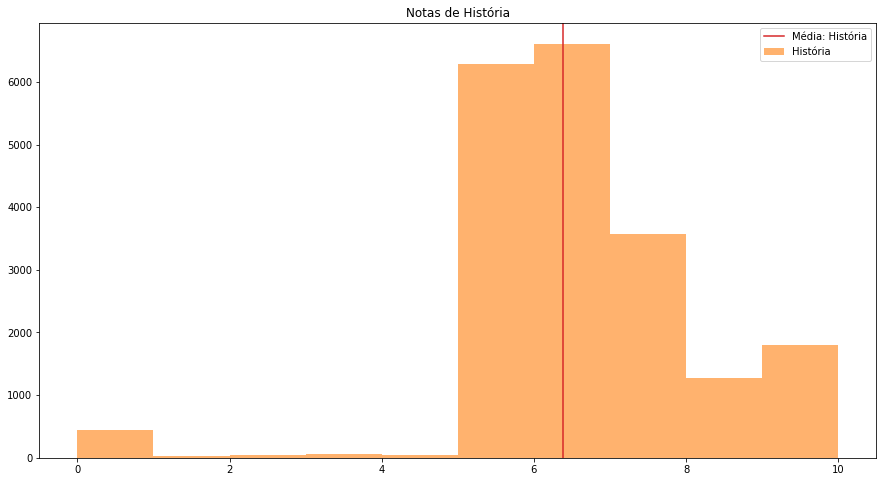

In [0]:
plt.figure(figsize=(15,8))
plt.title('Notas de História', fontdict={'color': 'black'})
plt.hist(x = new_df['História'],color='tab:orange',alpha=0.6,label='História')
plt.axvline(x = new_df['História'].mean(), color= 'tab:red',label='Média: História')
plt.legend()
plt.show()

In [0]:
new_df['História'].skew()

-0.49214276701909115

A distribuição das notas de História não é simétrica, trata-se de uma distribuição assimétrica à direita, ou seja, trata-se de uma assimetria negativa.

# Plotando e interpretando um gráfico 'scatter' entre matemática e a média das notas das disciplinas [biologia, química e física].

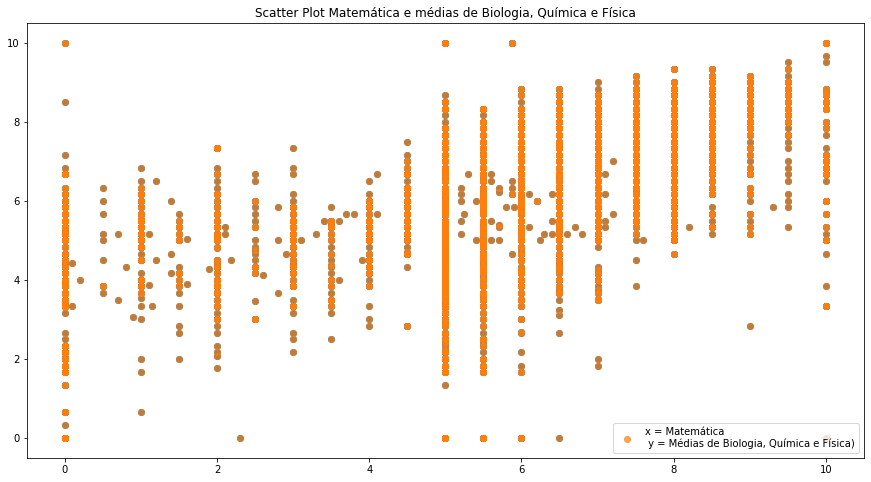

In [0]:
new_df['media_quimica_fisica_biologia'] = new_df[['Química','Física','Biologia']].mean(axis=1)

plt.figure(figsize=(15,8))
plt.scatter(x=new_df['Matemática'],y=new_df['media_quimica_fisica_biologia'])
plt.title('Scatter Plot Matemática e médias de Biologia, Química e Física', fontdict={'color': 'black'})
plt.scatter(x=new_df['Matemática'],y=new_df['media_quimica_fisica_biologia'],alpha=0.7, label='x = Matemática\n y = Médias de Biologia, Química e Física)')
plt.legend()
plt.show()

Pode-se perceber que não há uma distribuição linear entre os dados. Ainda, o eixo x representa as notas de Matemática, enquanto o eixo y representa as médias das notas de Biologia, Química e Física. Apesar de haver alguns outliers, por meio do gráfico é possível perceber que há alunos que tiram notas altas em matemática mas não nas outras matérias, e também há alunos que tiram notas altas nas outras matérias mas não em Matemática havendo, inclusive, uma grande concentração de zeros em Matamática.